[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/4dsolutions/clarusway_data_analysis/HEAD?labpath=%2FDVwPY_S6)

---

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Sources</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07 (Annex)</p>

## Data Sets in Seaborn and Plotly

By this time, we have seen that both Seaborn and Plotly Express provide some canonical data sets.  Lets review these two options.

### Seaborn

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

A first detail to notice upon checking the docs is getting seaborn data requires an internet connection.  In other words, these data sets we have been using are imported over the web, behind the scenes.

* [seaborn data on Github](https://github.com/mwaskom/seaborn-data)
* [Docs: seaborn.get_dataset_names](https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html)
* [Docs: seaborn.load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [79]:
crashes = sns.load_dataset("car_crashes")
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [80]:
crashes.abbrev.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [72]:
cols=["speeding", "alcohol", "not_distracted"]
totals = pd.DataFrame(crashes[cols].agg("sum"))
totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, speeding to not_distracted
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


In [68]:
totals.columns

RangeIndex(start=0, stop=1, step=1)

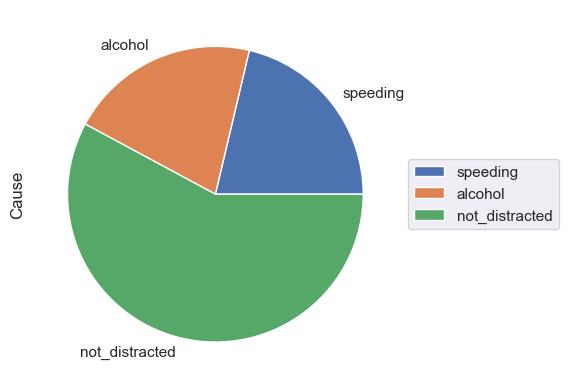

In [78]:
totals.plot.pie(y=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Cause");

In [93]:
crashes.iloc[0]

total               18.8
speeding           7.332
alcohol             5.64
not_distracted    18.048
no_previous        15.04
ins_premium       784.55
ins_losses        145.08
abbrev                AL
Name: 0, dtype: object

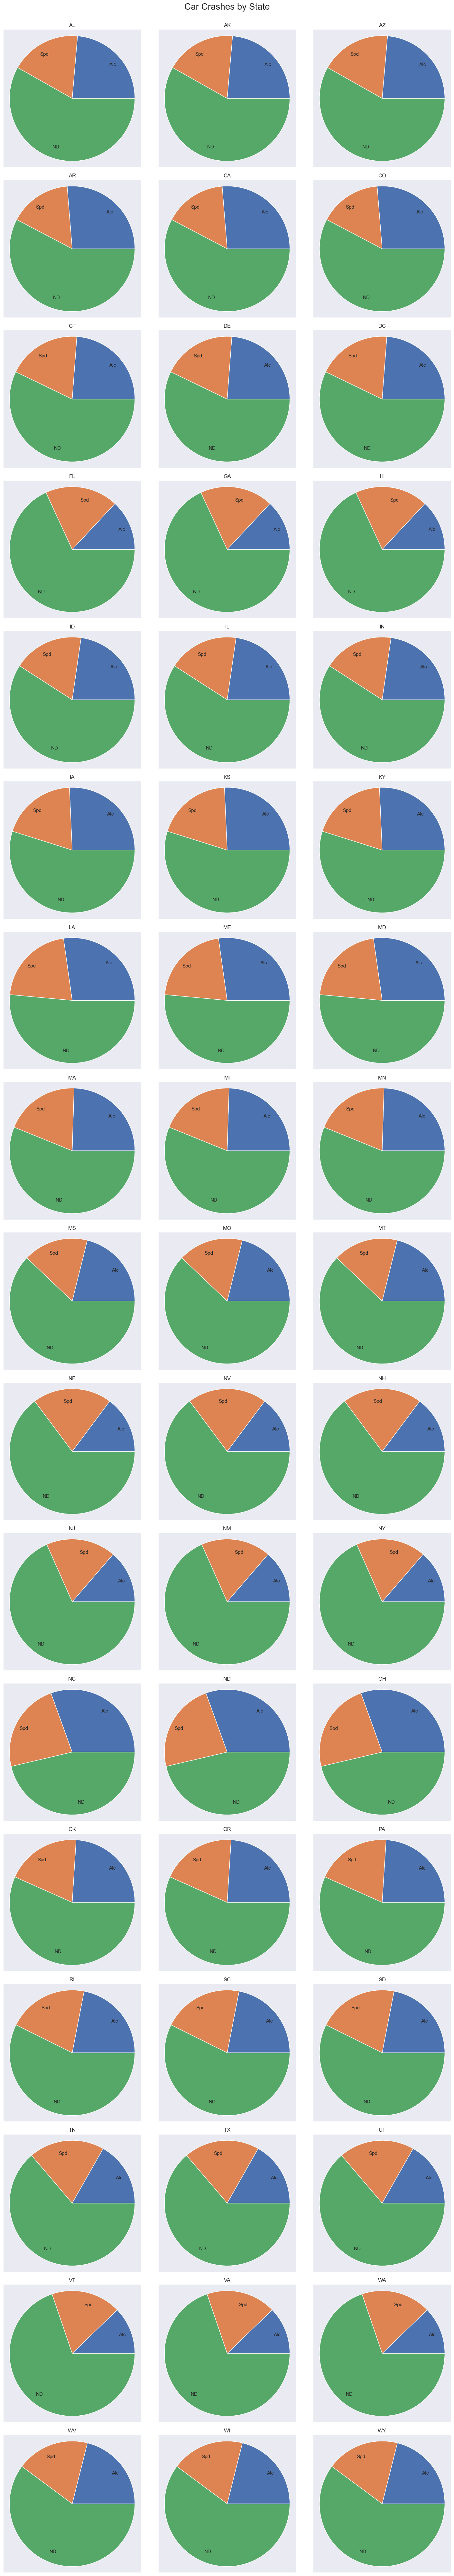

In [125]:
fig, axs = plt.subplots(17, 3, figsize=(15, 80))
fig.suptitle("Car Crashes by State", y=1, fontsize=20)

rows, cols = axs.shape
for row in range(rows):
    for col in range(cols):
        axs[row, col].set_title(crashes.iloc[3*row + col].abbrev)
        axs[row, col].set_xticks([])
        axs[row, col].set_yticks([])
        data = crashes.iloc[row, 1:4]
        axs[row, col].pie(data, labels=['Alc', 'Spd', 'ND'], labeldistance=0.8, frame=True)

plt.tight_layout()
plt.show();

### Plotly Express

Then we learned about [another stash of data sets](https://plotly.com/python-api-reference/generated/plotly.data.html), included within `plotly.express`. Most of the contents are callable functions which return pandas DataFrames.

One way to fine tune the data we want to import is through use of the [pandas.DataFrame.query](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method.

In [5]:
import plotly.express as px

In [9]:
[s for s in dir(px.data) if "__" not in s]

['absolute_import',
 'carshare',
 'election',
 'election_geojson',
 'experiment',
 'gapminder',
 'iris',
 'medals_long',
 'medals_wide',
 'stocks',
 'tips',
 'wind']

In [21]:
gd = px.data.gapminder() # gd for global_data
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [28]:
gd.query('country=="Germany"')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
564,Germany,Europe,1952,67.500,69145952,7144.114393,DEU,276
565,Germany,Europe,1957,69.100,71019069,10187.826650,DEU,276
566,Germany,Europe,1962,70.300,73739117,12902.462910,DEU,276
567,Germany,Europe,1967,70.800,76368453,14745.625610,DEU,276
568,Germany,Europe,1972,71.000,78717088,18016.180270,DEU,276
569,Germany,Europe,1977,72.500,78160773,20512.921230,DEU,276
570,Germany,Europe,1982,73.800,78335266,22031.532740,DEU,276
571,Germany,Europe,1987,74.847,77718298,24639.185660,DEU,276
572,Germany,Europe,1992,76.070,80597764,26505.303170,DEU,276
573,Germany,Europe,1997,77.340,82011073,27788.884160,DEU,276


In [36]:
germany = px.data.gapminder(year=2007).query('country=="Germany"') # gd for global_data
germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 575 to 575
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1 non-null      object 
 1   continent  1 non-null      object 
 2   year       1 non-null      int64  
 3   lifeExp    1 non-null      float64
 4   pop        1 non-null      int64  
 5   gdpPercap  1 non-null      float64
 6   iso_alpha  1 non-null      object 
 7   iso_num    1 non-null      int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 72.0+ bytes


Just because we're getting our data from plotly does not mean we have to plot it with plotly.  Lets plot directly from the pandas DataFrame, then from Seaborn, then finally with plotly.

**plot from pandas**

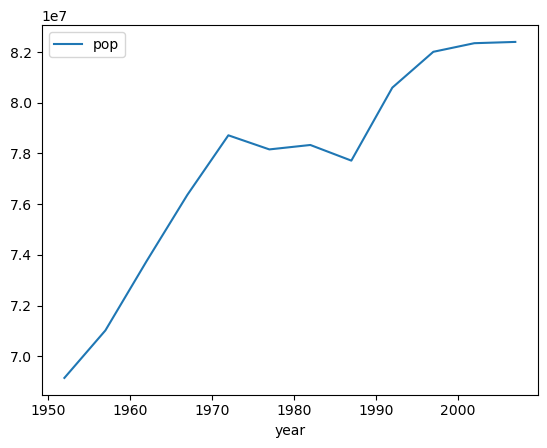

In [39]:
germany = px.data.gapminder().query('country=="Germany"') # gd for global_data
germany.plot(x="year", y="pop");

**plot from seaborn**

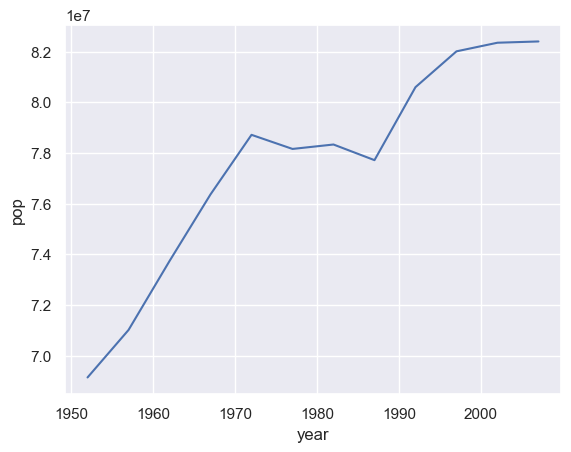

In [42]:
sns.set()
sns.lineplot(germany, x='year', y='pop');

**plot from plotly**

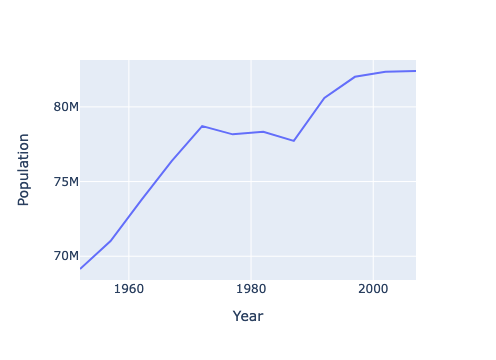

In [49]:
fig = px.line(data_frame=germany, x="year", y="pop",
              labels = dict(pop="Population", year="Year"))
fig.show()

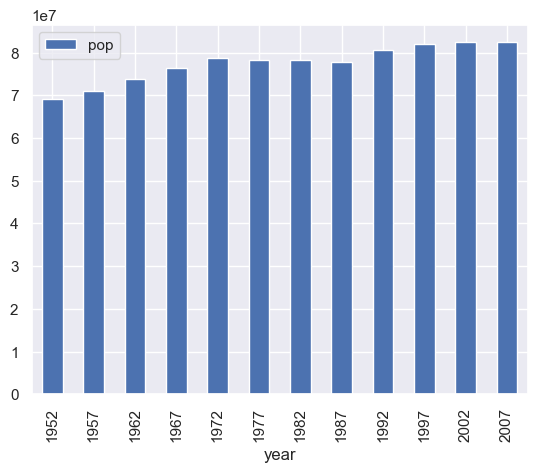

In [51]:
germany.plot.bar(x="year", y="pop");

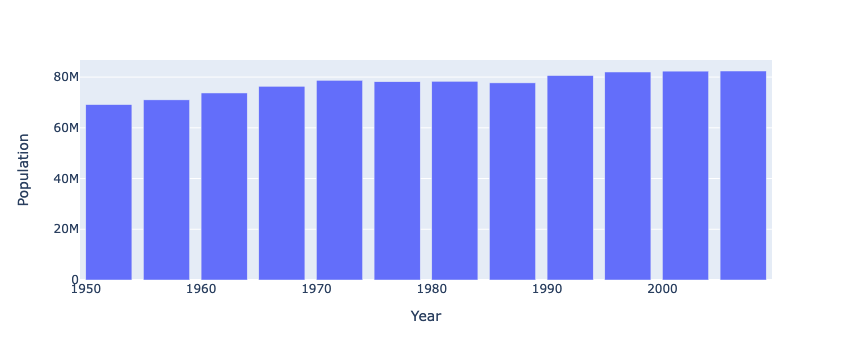

In [52]:
px.bar(data_frame=germany, x="year", y="pop",
              labels = dict(pop="Population", year="Year"))

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52632494223/in/datetaken-public/" title="Screen Shot 2023-01-16 at 7.10.30 PM"><img src="https://live.staticflickr.com/65535/52632494223_6ee936cd68_z.jpg" width="640" height="322" alt="Screen Shot 2023-01-16 at 7.10.30 PM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___